# Telecom Churn Dataset

## 1. Instalando dependências

In [1]:
!pip install -U imbalanced-learn


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


## 2. Importação das bibliotecas

In [2]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from operator import itemgetter




## 3. Conhecendo os dados

### Projeto

Fonte dados originais: https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets



No cenário competitivo das telecomunicações, a retenção de clientes é uma peça fundamental para o sucesso de qualquer empresa do setor. Este projeto visa utilizar análises avançadas e modelos preditivos para antecipar e mitigar a rotatividade de clientes, ao identificar os fatores que contribuem para a saída dos clientes, pode-se desenvolver estratégias proativas de retenção, promovendo a satisfação do cliente e fortalecendo sua posição competitiva no mercado.

Variáveis:

* **Maior65Anos**: Indica se o cliente tem mais de 65 anos de idade (1) ou não (0);

* **Conjuge:** Indica se o cliente tem cônjuge;
* **Dependentes**: Indica se o cliente tem dependentes;
* **MesesDeContrato:** O número de meses do contrato do cliente;
* **TelefoneFixo:** Indica se o cliente possui serviço de telefone fixo;
* **VariasLinhasTelefonicas:** Indica se o cliente possui várias linhas telefônicas;
* **ServicoDeInternet:** Indica se o cliente possui e qual é o serviço de internet;
* **SegurancaOnline:** Indica se o cliente possui serviço de segurança online;
* **BackupOnline:** Indica se o cliente possui serviço de backup online;
* **SeguroNoDispositivo:** Indica se o cliente possui seguro para dispositivos;
* **SuporteTecnico:** Indica se o cliente possui suporte técnico;
* **TVaCabo:** Indica se o cliente possui serviço de TV a cabo;
* **StreamingDeFilmes:** Indica se o cliente possui serviço de streaming de filmes;
* **TipoDeContrato:** O tipo de contrato do cliente (mensal, 1 ano e 2 anos).
* **PagamentoOnline:** Indica se o cliente utiliza pagamento online;
* **FormaDePagamento:** A forma de pagamento utilizada pelo cliente (cheque, cartão e débito);
* **ContaMensal:** O valor da conta mensal do cliente;
* **Churn:** Um indicador binário que indica se o cliente cancelou o serviço (1) ou não (0).

### Leitura do dataset

In [3]:
dados = pd.read_csv('Customer-Churn.csv')
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [4]:
dados.shape

(7043, 18)

In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

## 4. Tratamento de variáveis categóricas

Tratamento de forma manual para as colunas que possuem apenas dois valores únicos, sendo 'Sim' e 'Nao'.

In [6]:
mapeamento = {'Sim': 1,
              'Nao': 0}

colunas_para_mapear = ['Conjuge', 'Dependentes', 'TelefoneFixo','PagamentoOnline', 'Churn']
dados[colunas_para_mapear] = dados[colunas_para_mapear].replace(mapeamento)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1


Tratamento através do método get_dummies() para as colunas que possuem mais de dois valores únicos, esse processo transforma cada valor único em uma coluna binária.

In [7]:
dados = pd.get_dummies(dados).astype(int)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70,1,1,0,...,1,0,0,0,1,0,0,1,0,0


In [8]:
dados.columns

Index(['Maior65Anos', 'Conjuge', 'Dependentes', 'MesesDeContrato',
       'TelefoneFixo', 'PagamentoOnline', 'ContaMensal', 'Churn',
       'VariasLinhasTelefonicas_Nao',
       'VariasLinhasTelefonicas_SemServicoTelefonico',
       'VariasLinhasTelefonicas_Sim', 'ServicoDeInternet_DSL',
       'ServicoDeInternet_FibraOptica', 'ServicoDeInternet_Nao',
       'SegurancaOnline_Nao', 'SegurancaOnline_SemServicoDeInternet',
       'SegurancaOnline_Sim', 'BackupOnline_Nao',
       'BackupOnline_SemServicoDeInternet', 'BackupOnline_Sim',
       'SeguroNoDispositivo_Nao', 'SeguroNoDispositivo_SemServicoDeInternet',
       'SeguroNoDispositivo_Sim', 'SuporteTecnico_Nao',
       'SuporteTecnico_SemServicoDeInternet', 'SuporteTecnico_Sim',
       'TVaCabo_Nao', 'TVaCabo_SemServicoDeInternet', 'TVaCabo_Sim',
       'StreamingDeFilmes_Nao', 'StreamingDeFilmes_SemServicoDeInternet',
       'StreamingDeFilmes_Sim', 'TipoDeContrato_DoisAnos',
       'TipoDeContrato_Mensalmente', 'TipoDeContrato_UmAno

In [9]:
dados.shape

(7043, 39)

## 5. Divisão features e target

In [10]:
X = dados.drop('Churn', axis = 1)
y = dados['Churn']

In [11]:
X.shape, y.shape

((7043, 38), (7043,))

## 6. Balanceamento do dataset

Dados desbalanceados ocorrem quando a variável alvo (nesse caso, "Churn") possui muitos registros para uma classe e poucos para outra. Se não houver o balanceamento dos dados, pode causar problemas na construção de modelos preditivos, pois o modelo pode se tornar enviesado em direção à classe majoritária e ter dificuldade em reconhecer padrões nas classes minoritárias.

Para verificar se nosso dataset está desbalanceado, geramos um gráfico com o quantidade de registros de cada categoria da variável "churn".

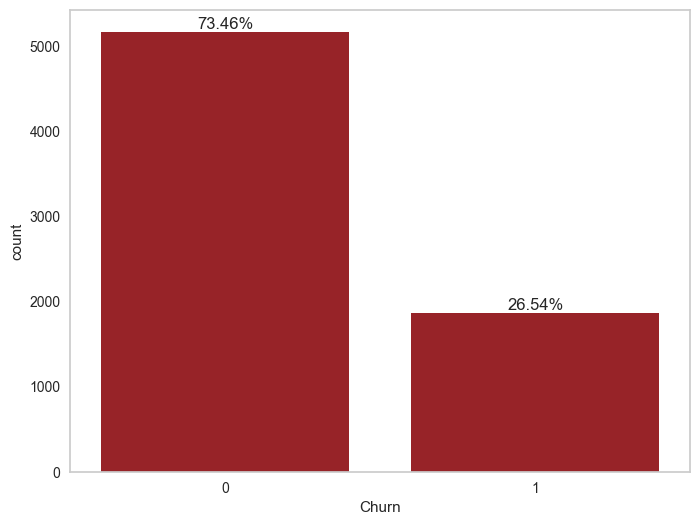

In [12]:
cor_seaborn = sns.color_palette("Reds")
cor = cor_seaborn[5] 

plt.figure(figsize = (8, 6))
ax = sns.countplot(x = y, color = cor) 

total = len(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha = "center", va = "bottom")
plt.grid(False)
plt.show()

Ao analisar o gráfico, concluímos que nossa variável está desbalanceada, possuindo 26.54% para uma classe enquanto a outra possui 73.46% dos dados. Para tratar o desbalanceamento, usaremos a técnica de Oversampling, que consiste em realizar o aumento de novas observações da classe minoritária, gerando novos registros sintéticos, com o objetivo de igualar a proporção entre as categorias.

In [13]:
smt = SMOTE(random_state = 123)  # instancia um objeto da classe SMOTE
X, y = smt.fit_resample(X, y)    # realiza a reamostragem do conjunto de dados

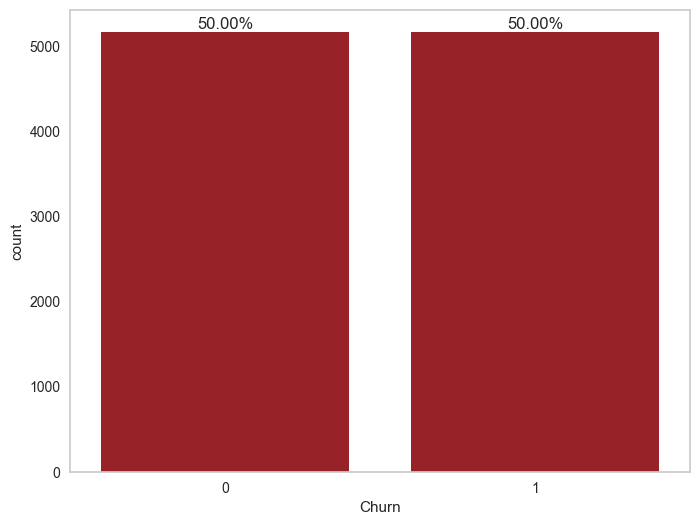

In [14]:
plt.figure(figsize = (8, 6))
ax = sns.countplot(x = y, color = cor) 

total = len(y)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2.,
            height + 3,
            '{:.2f}%'.format((height / total) * 100),
            ha = "center", va = "bottom")
plt.grid(False)
plt.show()

In [15]:
X.shape, y.shape

((10348, 38), (10348,))

## 7. Escalonamento dos features

In [16]:
norm = StandardScaler()
X = norm.fit_transform(X)

In [17]:
X[0]

array([-0.40949022,  1.27165114, -0.52875752, -1.10803629, -3.06253774,
        0.80941359, -1.33340616, -0.88378002,  3.18604176, -0.83183864,
        1.51441199, -1.04326198, -0.44617598,  0.86930072, -0.44617598,
       -0.51871996, -0.96076148, -0.44617598,  1.57836246,  1.04225252,
       -0.44617598, -0.64301486,  0.87979784, -0.44617598, -0.52396679,
        1.19022172, -0.44617598, -0.77691391,  1.20432168, -0.44617598,
       -0.78863399, -0.44648735,  0.74054467, -0.42116602, -0.4271925 ,
        1.29539717, -0.47958439, -0.43428742])

## 8. Divião das bases em treinamento e teste

In [18]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.3, random_state = 123)

In [19]:
X_treino.shape, y_treino.shape

((7243, 38), (7243,))

In [20]:

X_teste.shape, y_teste.shape

((3105, 38), (3105,))

## 9. Implementação dos modelos

Serão utilizados três modelos: K-nearest neighbors (KNN), Naive Bayes e Árvore de Decisão.

### K-nearest neighbors (KNN)

In [21]:
knn = KNeighborsClassifier(metric = 'euclidean')
knn.fit(X_treino, y_treino)
predict_knn = knn.predict(X_teste)

0.8093397745571659

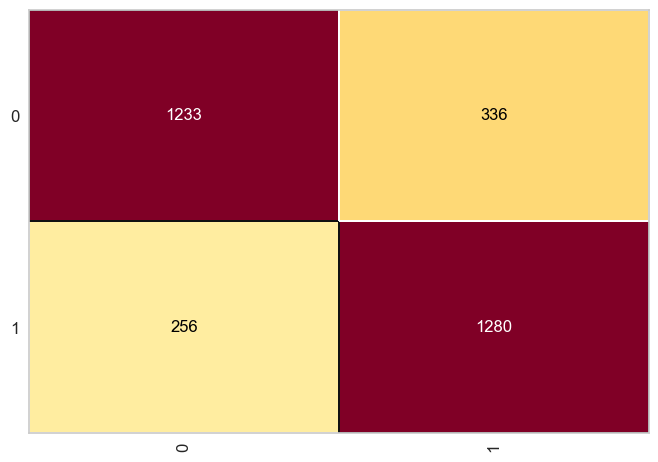

In [22]:
cm = ConfusionMatrix(knn)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [23]:
print(classification_report(y_teste, predict_knn))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1569
           1       0.79      0.83      0.81      1536

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



### Modelo Bernoulli Naive Bayes

In [24]:
mediana = np.median(X_treino)
mediana

bnb = BernoulliNB(binarize = np.abs(mediana)) # foi escolhida a mediana porque é o valor central
bnb.fit(X_treino, y_treino)
predict_bnb = bnb.predict(X_teste)

0.7665056360708534

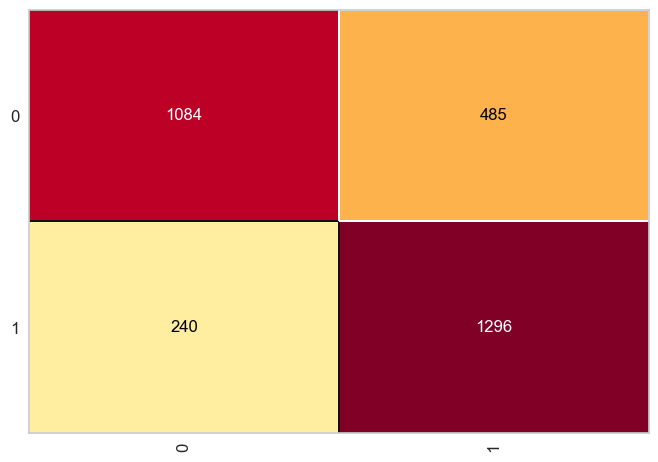

In [25]:
cm = ConfusionMatrix(bnb)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [26]:
print(classification_report(y_teste, predict_bnb))

              precision    recall  f1-score   support

           0       0.82      0.69      0.75      1569
           1       0.73      0.84      0.78      1536

    accuracy                           0.77      3105
   macro avg       0.77      0.77      0.77      3105
weighted avg       0.77      0.77      0.77      3105



### Árvore de decisão

In [27]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dtc.fit(X_treino, y_treino)
predict_dtc = dtc.predict(X_teste)

0.8016103059581321

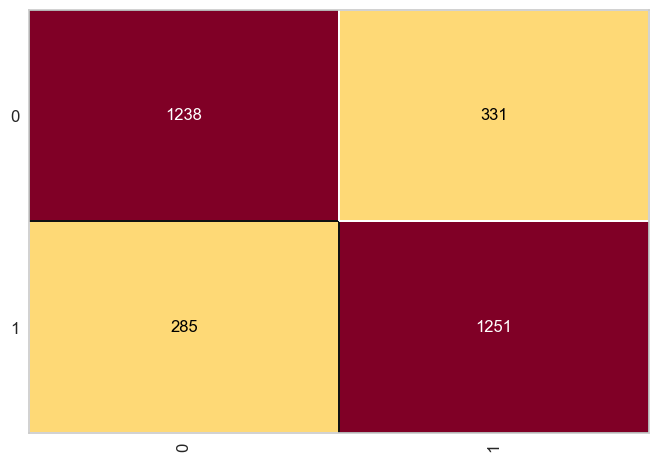

In [28]:
cm = ConfusionMatrix(dtc)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [29]:
print(classification_report(y_teste, predict_dtc))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1569
           1       0.79      0.81      0.80      1536

    accuracy                           0.80      3105
   macro avg       0.80      0.80      0.80      3105
weighted avg       0.80      0.80      0.80      3105



## 10. Escolha do modelo

Para um problema de previsão de churn (ou rotatividade), a métrica mais importante na matriz de confusão geralmente é a sensibilidade (recall) para a classe positiva, ou seja, a capacidade do modelo de identificar corretamente os clientes que estão prestes a sair (churn). Isso é crucial porque o custo de não identificar um cliente que está prestes a sair pode ser alto para a empresa, pois pode resultar na perda desse cliente.

In [30]:
dic_recall = {'KNN': recall_score(y_teste, predict_knn),
             'Naive Bayes': recall_score(y_teste, predict_bnb), 
             'Árvore de decisão': recall_score(y_teste, predict_dtc)}

maior_recall = max(dic_recall.values())
chave_maior_recall = max(dic_recall.items(), key = itemgetter(1))[0]

print(f'O modelo {chave_maior_recall} foi escolhido com o recall de {maior_recall * 100:.2f}%. ')


O modelo Naive Bayes foi escolhido com o recall de 84.38%. 
